### 数据预处理

In [130]:
import pandas as pd  # 导入pandas 
#col_names =['Country','Continent','Life_expectancy','GDP_per_capita','Population']  #设置表头（列标签）
Basket = pd.read_csv('Basket-2018-06-01-2018-07-05.csv',encoding='gbk')  # 取WordIndex.csv 数据
item = pd.read_csv('item-2018-06-01-2018-07-05.csv',encoding='gbk')  # 取WordIndex.csv 数据
print(Basket.shape) 
print(item.shape) 
Basket.head(5)   #查看前5行数据

(571552, 5)
(1048575, 10)


,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018/6/1,D007,3,250458,8.0
1,2018/6/1,D007,3,250200,32.7
2,2018/6/1,D007,1,161068,16.8
3,2018/6/1,D007,8,5325,30.4
4,2018/6/1,D007,8,5361,191.3


In [131]:
item.head()   #查看前5行数据

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018/6/1,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018/6/1,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018/6/1,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018/6/1,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018/6/1,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


In [132]:
Basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571552 entries, 0 to 571551
Data columns (total 5 columns):
SHOP_DATETIME    571552 non-null object
STORE_CODE       571552 non-null object
POS_NO           571552 non-null int64
BASK_CODE        571552 non-null int64
BASK_SPEND       571552 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 21.8+ MB


In [133]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
SDATE              1048575 non-null object
STORE_CODE         1048575 non-null object
POSID              1048575 non-null int64
BASK_CODE          1048575 non-null int64
PROD_CODE          1048575 non-null int64
ITEM_QUANTITY      1048575 non-null float64
ITEM_SPEND         1048575 non-null float64
NORMAL_PRICE       1048575 non-null float64
DISCOUNT_TYPE      1048575 non-null object
DISCOUNT_AMOUNT    1048575 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 80.0+ MB


In [134]:
Basket.columns=['date','shop','pos','bask','bask_spend']
item.columns=['date','shop','pos','bask','item','item_quantity','item_spend','price','discount_type','discount']

In [135]:
Basket.isnull().sum()

date          0
shop          0
pos           0
bask          0
bask_spend    0
dtype: int64

In [136]:
item.isnull().sum()

date             0
shop             0
pos              0
bask             0
item             0
item_quantity    0
item_spend       0
price            0
discount_type    0
discount         0
dtype: int64

In [137]:
Basket.duplicated().sum()


0

In [138]:
item.duplicated().sum()

128777

In [139]:
Basket.shop.value_counts()   #查看store种类及对应的数据个数

A001    66735
D002    63114
D007    37605
A008    36576
A013    30138
A006    28547
A012    25024
A009    21872
D004    21410
D008    21057
A021    20660
A010    19592
D006    18641
A016    18341
A007    18041
A019    17019
D009    15876
A018    15771
D005    15328
A022    15304
A004    13490
A017    12513
D010    11095
D003     7803
Name: shop, dtype: int64

In [140]:
Basket.pos.value_counts()   #查看pos类及对应的数据个数

2     176108
1     160802
3     101181
6      39383
4      31148
8      21326
9      18203
5      12316
13      5616
10      2649
20      1386
7       1181
19       253
Name: pos, dtype: int64

In [141]:
Basket.bask.value_counts()   #查看BASK种类及对应的数据个数

210182    7
211341    7
210934    7
208755    7
208546    7
         ..
268170    1
288644    1
286595    1
282497    1
6147      1
Name: bask, Length: 281211, dtype: int64

In [142]:
item.item.value_counts()   #查看BASK种类及对应的数据个数

194690    6830
205540    6668
21835     6593
178462    5435
72811     5107
          ... 
128846       1
206997       1
204948       1
133424       1
20624        1
Name: item, Length: 17441, dtype: int64

In [143]:
item.discount_type.value_counts()   #查看折扣种类及对应的数据个数

n    664322
p    250970
m    120692
v     10612
q      1234
x       657
Z        76
s        11
h         1
Name: discount_type, dtype: int64

In [144]:
#日消费
days= Basket.drop_duplicates(subset=['date'])
totalMoney = Basket.loc[:,'bask_spend'].sum()
totalI = DAYS.shape[0]
days_m=totalMoney//totalI
days_m

636436.0

In [145]:
from pandas import to_datetime
Basket1=Basket
Basket1.date=to_datetime(Basket1.date,format="%Y/%m/%d")
Basket1

,date,shop,pos,bask,bask_spend
0,2018-06-01,D007,3,250458,8.00
1,2018-06-01,D007,3,250200,32.70
2,2018-06-01,D007,1,161068,16.80
3,2018-06-01,D007,8,5325,30.40
4,2018-06-01,D007,8,5361,191.30
...,...,...,...,...,...
571547,2018-07-05,A010,2,284211,34.71
571548,2018-07-05,A010,2,284601,44.80
571549,2018-07-05,A010,2,284241,6.50
571550,2018-07-05,A010,2,284352,15.90


In [154]:
Basket1_sale=Basket1.drop(['shop','pos','bask'],axis=1)
dasale=Basket1_sale.groupby(Basket1.date)
daysales=daysale.sum()
daysale1.head(15)

,bask_spend
date,
2018-06-01,717327.28
2018-06-02,727910.16
2018-06-03,682779.75
2018-06-04,557813.05
2018-06-05,663394.81
2018-06-06,498250.71
2018-06-07,436109.19
2018-06-08,564402.27
2018-06-09,679629.48


In [91]:
daysale1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2018-06-01 to 2018-07-05
Data columns (total 1 columns):
BASK_SPEND    35 non-null float64
dtypes: float64(1)
memory usage: 560.0 bytes


(array([4., 2., 4., 5., 6., 1., 2., 3., 4., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 411610.22      ,  448092.98966667,  484575.75933334,
         521058.529     ,  557541.29866667,  594024.06833334,
         630506.838     ,  666989.60766667,  703472.37733334,
         739955.147     ,  776437.91666667,  812920.68633334,
         849403.456     ,  885886.22566667,  922368.99533334,
         958851.765     ,  995334.53466667, 1031817.30433334,
        1068300.074     , 1104782.84366667, 1141265.61333334,
        1177748.383     , 1214231.15266667, 1250713.92233334,
        1287196.692     , 1323679.46166667, 1360162.23133333,
        1396645.001     , 1433127.77066667, 1469610.54033333,
        1506093.31      ]),
 <a list of 30 Patch objects>)

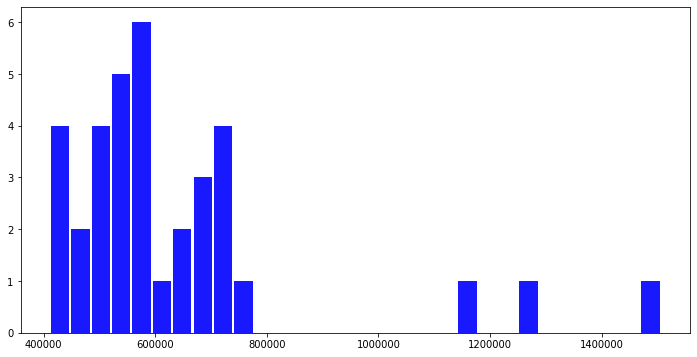

In [104]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings 

plt.figure(figsize=(12,6))
plt.hist(daysale1.BASK_SPEND,bins=30,color = 'blue', alpha = 0.9,rwidth=0.9)

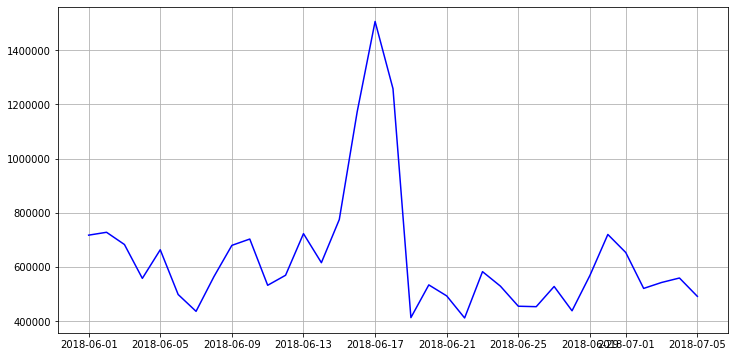

In [227]:
fig, ax = plt.subplots()
ax.grid()
plt.plot(daysale1['bask_spend'],color='blue')
plt.rcParams['figure.figsize'] = (12.0, 6.0)

In [251]:
shop_group=Basket1.groupby(Basket1.shop)
shopsale=shop_group.sum()
shopsale.head(24)

,pos,bask,bask_spend
shop,,,
A001,363398,11605971867,3.435303e+06
A004,27718,1529688783,5.123467e+05
A006,65757,8062830890,9.383050e+05
A007,36708,2053120185,6.866382e+05
A008,94583,7763818159,1.311171e+06
A009,34405,4647022389,7.977389e+05
A010,49184,4793496547,6.448924e+05
A012,64419,5934484788,8.469747e+05
A013,110323,5146283161,1.117126e+06


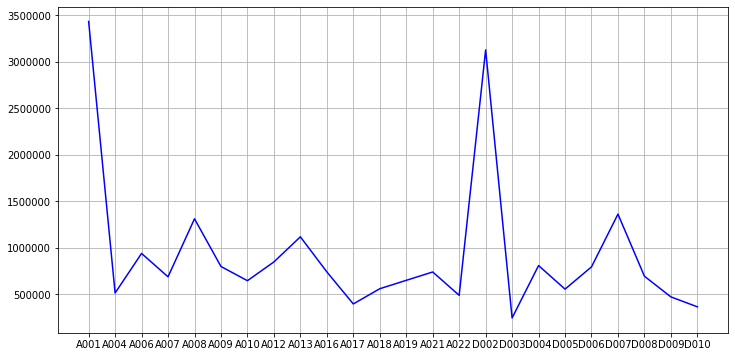

In [252]:
fig, ax = plt.subplots()
ax.plot(shopsale['bask_spend'],color='blue')
ax.grid()
plt.rcParams['figure.figsize'] = (12.0, 6.0)

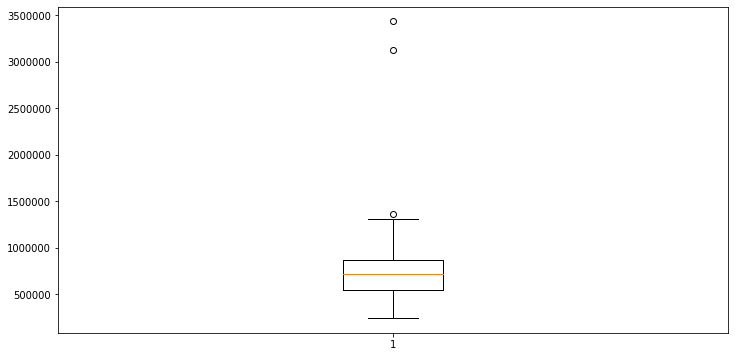

In [263]:
#商店销售箱图
plt.boxplot(shopsale.bask_spend)
plt.show()

In [193]:
#将数据按discount分组
n=item[item.discount_type=="n"]
p=item[item.discount_type=="p"]
m=item[item.discount_type=='m']
v=item[item.discount_type=='v']
q=item[item.discount_type=='q']
x=item[item.discount_type=='x']
Z=item[item.discount_type=='Z']
s=item[item.discount_type=='s']
h=item[item.discount_type=='h']
n

,date,shop,pos,bask,item,item_quantity,item_spend,price,discount_type,discount
1,2018/6/1,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
4,2018/6/1,D007,1,160905,195012,3.222,18.69,5.8,n,0.0
5,2018/6/1,D007,1,160905,194904,3.522,35.22,10.0,n,0.0
6,2018/6/1,D007,3,250458,56371,1.000,8.00,8.0,n,0.0
7,2018/6/1,D007,3,250241,75124,12.000,30.00,2.5,n,0.0
...,...,...,...,...,...,...,...,...,...,...
1048570,2018/6/25,A009,1,261138,221691,1.000,1.00,1.0,n,0.0
1048571,2018/6/25,A009,1,261138,221691,1.000,1.00,1.0,n,0.0
1048572,2018/6/25,A009,2,53820,200455,0.234,5.99,25.6,n,0.0
1048573,2018/6/25,A009,1,261306,281,1.000,6.50,6.5,n,0.0


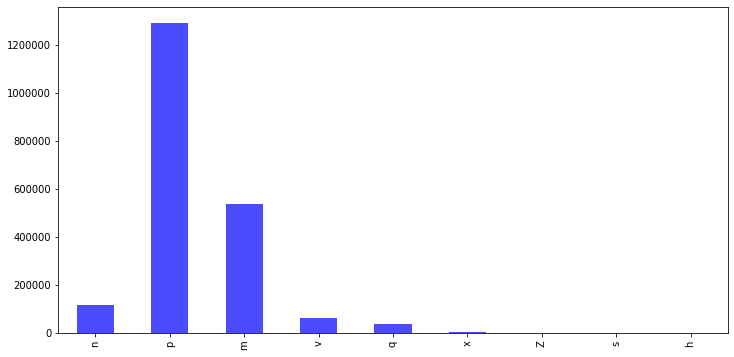

In [187]:
#discount=apply(lambda item : item.discount)
p=pd.Series([-n.discount.sum(), -p.discount.sum(), -m.discount.sum(), -v.discount.sum(), -q.discount.sum(),-x.discount.sum(),-Z.discount.sum(),-s.discount.sum(),-h.discount.sum()], index=['n', 'p', 'm', 'v', 'q','x','Z','s','h'])
p.plot(kind='bar',color = 'blue', alpha = 0.7)

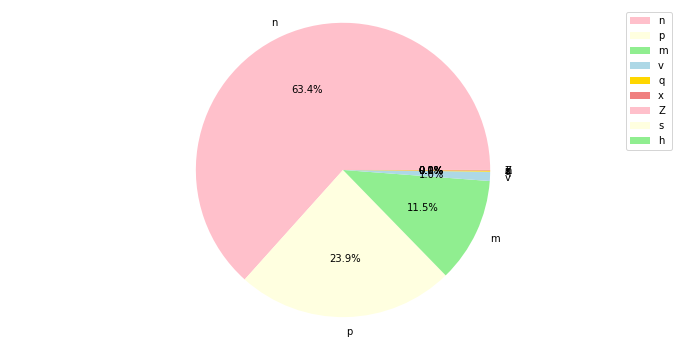

In [216]:
#绘制各折扣数量占比
import numpy as np
dis_count = item.discount_type.value_counts()  # 统计每种折扣数
conti = list(dis_count.index)  # 获取各大州名称
labels = conti
colors = ['pink', 'lightyellow', 'lightgreen','lightblue','gold','lightcoral']
plt.pie(dis_count, labels=labels, colors=colors,shadow=False, autopct='%1.1f%%',pctdistance = 0.6)  # autopct 显示占比

plt.axis('equal')  # 调整坐标轴的比例
plt.legend()
plt.show()